# Taller #1


Integrantes:

Juliana Catalina De Castro Moreno - jdec@unal.edu.co

Juan Manuel De La Torre Sanchez - jdela@unal.edu.co

---

Todo el codigo fuente puede encontrarse en el siguiente repositorio:
[Github](https://github.com/JM-delatorre/TecnicasIA)


## Import
Primero importamos todas las librerias necesarias para el proyecto

In [96]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Funciones

Aqui tendremos las fuinciones necesarias para nuestras comparaciones

In [97]:
def loadAndConvertImage(filename):
  img = cv.imread(filename)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  return gray

def calcHistogram(image, bins, normalize):
  hist = cv.calcHist([image], [0], None, [bins], [0,256])

  assert len(image.shape) == 2, "La imagen no es 2D (escala de grises)"
  assert image.dtype in [np.uint8, np.float32], "Tipo de datos no válido para la imagen"
  if normalize:
    hist_norm = cv.normalize(hist, hist).flatten()
    return hist_norm
  else:
    return hist
  
def compareHistograms(hist1, hist2, method):
  result = cv.compareHist(hist1, hist2, method)
  return result

## Logica punto a

En la parte A donde se compara los diferentes histogramas de la foto en interior

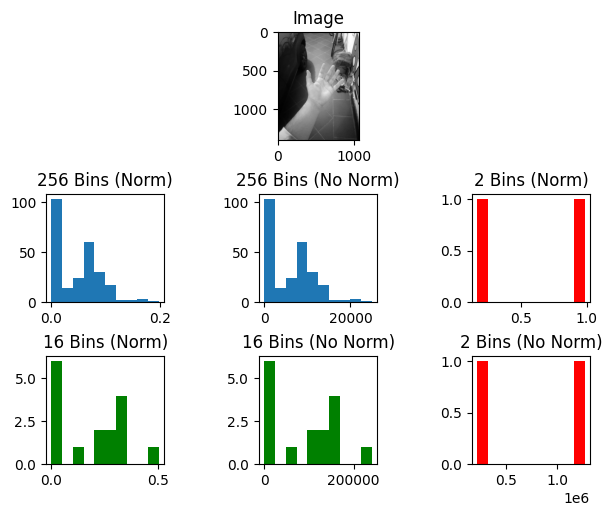

In [98]:
img = loadAndConvertImage('Images/indoor.jpg')
plt.figure(1)

plt.subplot(332), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(334), plt.hist(calcHistogram(img, 256, True)) ,plt.title('256 Bins (Norm)')
plt.subplot(335), plt.hist(calcHistogram(img, 256, False)) ,plt.title('256 Bins (No Norm)')
plt.subplot(336), plt.hist(calcHistogram(img, 2, True),facecolor='r'), plt.title('2 Bins (Norm)')
plt.subplot(339), plt.hist(calcHistogram(img, 2, False),facecolor='r'), plt.title('2 Bins (No Norm)')
plt.subplot(337), plt.hist(calcHistogram(img, 16,True),facecolor='g'), plt.title('16 Bins (Norm)')
plt.subplot(338), plt.hist(calcHistogram(img, 16, False),facecolor='g'), plt.title('16 Bins (No Norm)')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.50, wspace=0.80)

plt.show()

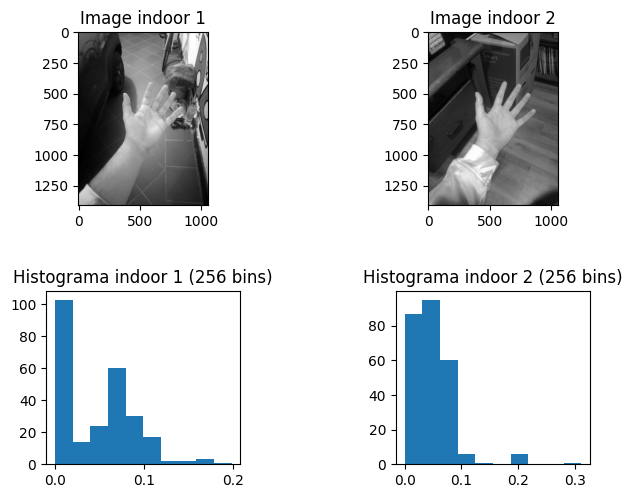

Comparison (indoor,  bins 2, method: CORRELACION ): 1.0
Comparison (indoor,  bins 2, method: CHISQR ): 0.14161845897225098
Comparison (indoor,  bins 2, method: INTERSECT ): 1.1159710884094238
Comparison (indoor,  bins 2, method: BHATTACHARYYA ): 0.09611470780324148
Comparison (indoor,  bins 16, method: CORRELACION ): 0.7453466576982543
Comparison (indoor,  bins 16, method: CHISQR ): 1.0702144629908519
Comparison (indoor,  bins 16, method: INTERSECT ): 2.5713203251361847
Comparison (indoor,  bins 16, method: BHATTACHARYYA ): 0.24594414255077426
Comparison (indoor,  bins 256, method: CORRELACION ): 0.5893440784023761
Comparison (indoor,  bins 256, method: CHISQR ): 7.239916093109933
Comparison (indoor,  bins 256, method: INTERSECT ): 9.14510525856167
Comparison (indoor,  bins 256, method: BHATTACHARYYA ): 0.28188987699239776


In [99]:
img2 = loadAndConvertImage('Images/indoor_2.jpg')
bin_counts = [2, 16, 256]
methods = ["CORRELACION", "CHISQR", "INTERSECT","BHATTACHARYYA"]

indoor_histograms = [calcHistogram(img, bins, True) for bins in bin_counts]
indoor_2_histograms = [calcHistogram(img2, bins, True) for bins in bin_counts]

plt.figure(1)

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Image indoor 1')
plt.subplot(222), plt.imshow(img2, cmap='gray'), plt.title('Image indoor 2')
plt.subplot(223), plt.hist(indoor_histograms[2]), plt.title('Histograma indoor 1 (256 bins)')
plt.subplot(224), plt.hist(indoor_2_histograms[2]), plt.title('Histograma indoor 2 (256 bins)')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.50, wspace=0.80)

plt.show()

for i in range(len(bin_counts)):
  for j in range(len(methods)): 
    comp = compareHistograms(indoor_histograms[i], indoor_2_histograms[i], j)
    print(f"Comparison (indoor,  bins {bin_counts[i]}, method: {methods[j]} ): {comp}")
  print("==============================================================================")


## Logica Punto B

Para la segunda parte se hace una comparacion con las imagenes del exterior

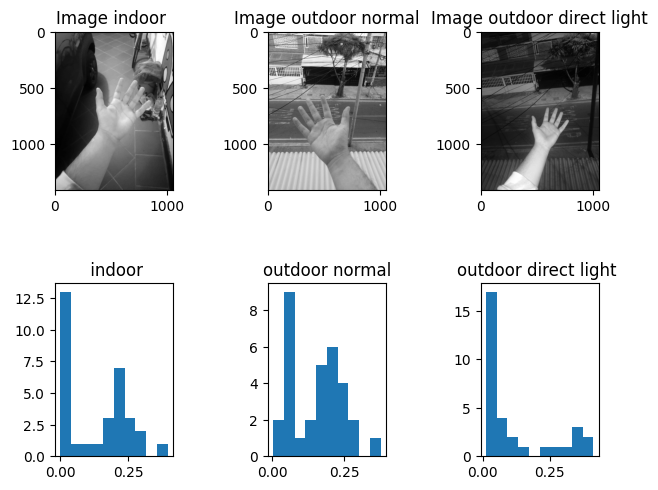

COMPARACION CON OUTDOOR NORMAL
Comparison (indoor,  bins 8, method: CORRELACION ): -0.06601505645510904
Comparison (indoor,  bins 8, method: CHISQR ): 3.0863914549200793
Comparison (indoor,  bins 8, method: INTERSECT ): 1.4137662686407566
Comparison (indoor,  bins 8, method: BHATTACHARYYA ): 0.44097318585237727
Comparison (indoor,  bins 32, method: CORRELACION ): 0.017125437395790137
Comparison (indoor,  bins 32, method: CHISQR ): 6.748306209402862
Comparison (indoor,  bins 32, method: INTERSECT ): 2.5566286670509726
Comparison (indoor,  bins 32, method: BHATTACHARYYA ): 0.4525916513425743


COMPARACION CON OUTDOOR DIRECT LIGHT
Comparison (indoor,  bins 8, method: CORRELACION ): -0.06601505645510904
Comparison (indoor,  bins 8, method: CHISQR ): 3.0863914549200793
Comparison (indoor,  bins 8, method: INTERSECT ): 1.4137662686407566
Comparison (indoor,  bins 8, method: BHATTACHARYYA ): 0.44097318585237727
Comparison (indoor,  bins 32, method: CORRELACION ): 0.017125437395790137
Comparis

In [100]:
img_outdoor_normal = loadAndConvertImage('Images/outdoor_normal.jpg')
img_outdoor_direct_light = loadAndConvertImage('Images/outdoor_direct_light.jpg')

bin_counts = [8,32]
methods = ["CORRELACION", "CHISQR", "INTERSECT","BHATTACHARYYA"]

indoor_histograms = [calcHistogram(img, bins, True) for bins in bin_counts]
outdoor_normal_histograms = [calcHistogram(img_outdoor_normal, bins, True) for bins in bin_counts]
outdoor_direct_light_histograms = [calcHistogram(img_outdoor_direct_light, bins, True) for bins in bin_counts]

plt.figure(1)

plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Image indoor ')
plt.subplot(232), plt.imshow(img_outdoor_normal, cmap='gray'), plt.title('Image outdoor normal')
plt.subplot(233), plt.imshow(img_outdoor_direct_light, cmap='gray'), plt.title('Image outdoor direct light')
plt.subplot(234), plt.hist(indoor_histograms[1]), plt.title(' indoor')
plt.subplot(235), plt.hist(outdoor_normal_histograms[1]), plt.title('outdoor normal')
plt.subplot(236), plt.hist(outdoor_direct_light_histograms[1]), plt.title('outdoor direct light ')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.50, wspace=0.80)

plt.show()
print("COMPARACION CON OUTDOOR NORMAL")
for i in range(len(bin_counts)):
  for j in range(len(methods)): 
    comp = compareHistograms(indoor_histograms[i], outdoor_normal_histograms[i], j)
    print(f"Comparison (indoor,  bins {bin_counts[i]}, method: {methods[j]} ): {comp}")
  print("==============================================================================")
print()
print()
print("COMPARACION CON OUTDOOR DIRECT LIGHT")
for i in range(len(bin_counts)):
  for j in range(len(methods)): 
    comp = compareHistograms(indoor_histograms[i], outdoor_normal_histograms[i], j)
    print(f"Comparison (indoor,  bins {bin_counts[i]}, method: {methods[j]} ): {comp}")
  print("==============================================================================")

## Conclusiones

### Punto a
Al usar todas nuestras estadisiticas podemos notar que cuando tenemos valores de bins bajos, hay mucha similaridad entre las dos imagenes, ya que estas dos son tomadas indoor pero en momentos diferentes del dia y con iluminaciones algo distintas (mas no completamente diferentes), estos valores nos indican similaridad en la densidad de pixeles

* Correlacion valores entre 1.0 y 0.7
* CHISQR valores bajos entre 0.14 y 1.07
* Interseccion valores bajos en bins bajos (entre 1 y 3)
* BHATTACHARYYA valores bajos entre (menores a 0.3)

Sin embargo al aumentar la cantidad de bins podemos notar mas claramente las diferencias 

  * Correlacion valores de 0.5
  * CHISQR valores altos de 7.0
  * Interseccion valores altos de 9.0
  * BHATTACHARYYA valores mas cercanos a 0.3

### Punto b

  En esta segunda parte, la diferenciacion entre las imagenes es mucho mas notoria (las indoor con las outdoor), en este caso por los cambios de iluminacion tan abruptos que pueden encontrarse, igualmente las diferencias son muy notorias al aumentar la cantidad de bins lo que nos permite ver (al encontrar mas detalles) como cambian las estadisticas de los histogramas
  
Bins bajos:

  * Correlacion valores negativos
  * CHISQR valores bajos de 3.0
  * Interseccion valores bajos cercanos a 1.5
  * BHATTACHARYYA valores menores a 0.5

Bins Altos:

  * Correlacion valores muy bajos cercanos a 0
  * CHISQR valores altos cercanos a 7.0
  * Interseccion valores altos cercanos a 3.0
  * BHATTACHARYYA valores cercanos 0.5